In [ ]:
# For data reading
import pandas as pd 

# For reading the array 
import numpy as np

# For visualize the data and plottting parameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,108]
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# For data reading | manipulation :
import pandas as pd 

# For reading the array :
import numpy as np

# For visualize the data and plottting patameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
import seaborn as sns

# To suppress warnings :
from warnings import filterwarnings
filterwarnings('ignore')

# Import train-test split :
from sklearn.model_selection import train_test_split

# Import 'stats' libraries for modeling :
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS

# To scaled the data :
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # Scaling
import math
from sklearn.metrics import  r2_score
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Filling missing values

In [ ]:
# Reading data :
pm10 = pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/pollutants/Daily_data/nagpur/pm10_1.csv')
satpm10=pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/relationship/nagpur/PM10.csv')


In [ ]:
pm10

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,PM10
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,NaN
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,NaN
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,NaN
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,NaN
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,NaN
...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,54.830
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,53.858
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,69.024
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,74.583


In [ ]:
satpm10

,Date,Satellite,CPCB,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,01-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-16,NaN,NaN,NaN,NaN,NaN,NaN,slope:,-3.54751
...,...,...,...,...,...,...,...,...,...
1456,27-12-19,NaN,54.830,NaN,NaN,NaN,NaN,NaN,NaN
1457,28-12-19,NaN,53.858,NaN,NaN,NaN,NaN,NaN,NaN
1458,29-12-19,NaN,69.024,NaN,NaN,NaN,NaN,NaN,NaN
1459,30-12-19,NaN,74.583,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
extracted_col=satpm10['Satellite']

pm10=pm10.join(extracted_col)

extracted_col1=satpm10['CPCB']
pm10=pm10.join(extracted_col1)



In [ ]:
pm10

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,PM10,Satellite,CPCB
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,NaN,NaN,NaN
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,NaN,NaN,NaN
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,NaN,NaN,NaN
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,NaN,NaN,NaN
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,54.830,NaN,54.830
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,53.858,NaN,53.858
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,69.024,NaN,69.024
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,74.583,NaN,74.583


In [ ]:
#finding % of the missing values in each coloumn
nullValues = pm10.isnull().sum()
nullValues

Date             0
T2M              0
PRECTOTCORR      0
PS               0
RH2M             0
WS10M            0
WD10M            0
PM10           501
Satellite      971
CPCB           501
dtype: int64

In [ ]:
pm10_new=pm10['PM10'].fillna((3)*pm10['Satellite']+77)

pm10_new

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1456     54.830
1457     53.858
1458     69.024
1459     74.583
1460    335.230
Name: PM10, Length: 1461, dtype: float64

In [ ]:
pm10_interpolate=pm10_new.interpolate()

pm10_interpolate

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1456     54.830
1457     53.858
1458     69.024
1459     74.583
1460    335.230
Name: PM10, Length: 1461, dtype: float64

In [ ]:
pm10_interpolate=pm10_interpolate.bfill()

In [ ]:
nullValues = pm10_interpolate.isnull().sum()
nullValues

0

In [ ]:
pm10_interpolate.to_csv('filled.csv', index=False)

###train test split

In [ ]:
pm10 = pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/processed_data/nagpur/PM10.csv')

In [ ]:
pm10

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,PM10
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,123.727
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,123.727
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,123.727
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,123.727
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,123.727
...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,54.830
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,53.858
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,69.024
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,74.583


In [ ]:
pm10=pm10.drop(['Date'],axis=1)

###Ouliers

In [ ]:
pm10['zscore'] = ( pm10.PM10 - pm10.PM10.mean() ) / pm10.PM10.std()
pm10

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,PM10,zscore
0,23.26,0.00,98.55,35.38,1.84,144.25,123.727,0.996785
1,23.38,0.00,98.53,33.19,1.52,137.00,123.727,0.996785
2,21.19,0.00,98.45,32.56,2.90,62.69,123.727,0.996785
3,20.94,0.00,98.51,35.06,2.67,86.00,123.727,0.996785
4,21.66,0.00,98.41,30.44,1.73,108.44,123.727,0.996785
...,...,...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38,54.830,-0.989060
1457,11.83,0.00,98.43,57.94,3.41,68.00,53.858,-1.017077
1458,12.38,0.00,98.43,58.62,2.76,64.56,69.024,-0.579941
1459,14.22,0.10,98.35,66.81,2.78,75.00,74.583,-0.419712


In [ ]:


pm10_no_outliers = pm10[(pm10.zscore>-3) & (pm10.zscore<3)]
pm10_no_outliers.head()



,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,PM10,zscore
0,23.26,0.0,98.55,35.38,1.84,144.25,123.727,0.996785
1,23.38,0.0,98.53,33.19,1.52,137.00,123.727,0.996785
2,21.19,0.0,98.45,32.56,2.90,62.69,123.727,0.996785
3,20.94,0.0,98.51,35.06,2.67,86.00,123.727,0.996785
4,21.66,0.0,98.41,30.44,1.73,108.44,123.727,0.996785


In [ ]:
pm10_no_outliers.shape

(1454, 8)

In [ ]:
pm10_no_outliers=pm10_no_outliers.drop(['zscore'],axis=1)

In [ ]:
pm10=pm10_no_outliers
pm10

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,PM10
0,23.26,0.00,98.55,35.38,1.84,144.25,123.727
1,23.38,0.00,98.53,33.19,1.52,137.00,123.727
2,21.19,0.00,98.45,32.56,2.90,62.69,123.727
3,20.94,0.00,98.51,35.06,2.67,86.00,123.727
4,21.66,0.00,98.41,30.44,1.73,108.44,123.727
...,...,...,...,...,...,...,...
1455,20.90,1.42,98.14,85.00,1.36,210.00,73.325
1456,15.15,0.07,98.29,59.81,4.29,21.38,54.830
1457,11.83,0.00,98.43,57.94,3.41,68.00,53.858
1458,12.38,0.00,98.43,58.62,2.76,64.56,69.024


###Correlation

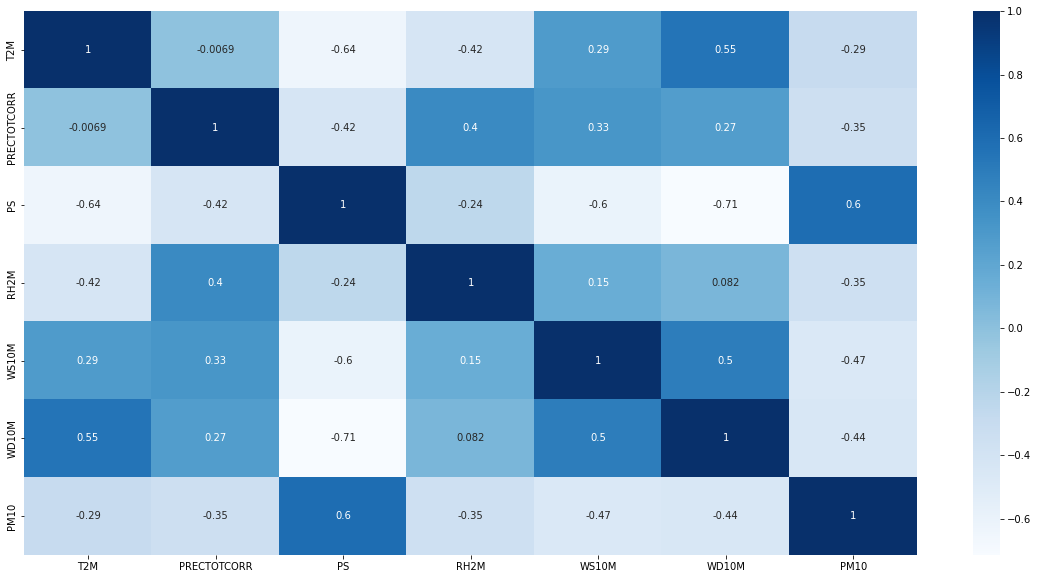

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(pm10.corr(), annot=True, cmap='Blues')

plt.show()

###Independent and dependent variables

In [ ]:
 x=pm10.iloc[:,:-1]
y=pm10.iloc[:,-1]

In [ ]:
x

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M
0,23.26,0.00,98.55,35.38,1.84,144.25
1,23.38,0.00,98.53,33.19,1.52,137.00
2,21.19,0.00,98.45,32.56,2.90,62.69
3,20.94,0.00,98.51,35.06,2.67,86.00
4,21.66,0.00,98.41,30.44,1.73,108.44
...,...,...,...,...,...,...
1455,20.90,1.42,98.14,85.00,1.36,210.00
1456,15.15,0.07,98.29,59.81,4.29,21.38
1457,11.83,0.00,98.43,57.94,3.41,68.00
1458,12.38,0.00,98.43,58.62,2.76,64.56


In [ ]:
y

0       123.727
1       123.727
2       123.727
3       123.727
4       123.727
         ...   
1455     73.325
1456     54.830
1457     53.858
1458     69.024
1459     74.583
Name: PM10, Length: 1454, dtype: float64

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

###feature transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt_x = PowerTransformer(method='yeo-johnson')
pt_y = PowerTransformer(method='yeo-johnson')
x_train = pt_x.fit_transform(x_train)
x_test = pt_x.transform(x_test)
y_train = pt_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = pt_y.transform(np.array(y_test).reshape(-1,1))

###SVR 

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([-3.51575529e-01, -3.59430088e-01, -8.28849856e-01, -4.08306475e-01,
        1.05005262e+00,  8.00640022e-01,  9.31458942e-01, -1.63787426e-02,
        4.33856991e-01, -1.13501157e-02, -7.03371863e-01,  8.81025891e-01,
        7.91150829e-02, -4.69161950e-01,  4.24025201e-01, -1.12577559e+00,
        2.09153229e-01,  8.38354528e-01,  1.00922409e+00, -7.53470856e-01,
        3.28186932e-01,  2.93892338e-01,  8.14240210e-01, -2.73837498e-01,
       -1.29643260e+00,  1.41928459e-01,  5.80995859e-01,  3.52342002e-01,
        3.60602261e-01, -4.82506213e-01, -1.16516638e+00, -3.12045840e-01,
        7.91371543e-02, -4.29655973e-01,  5.86222068e-01, -2.77233609e-01,
        1.13925244e+00,  6.84710871e-01, -5.15879442e-01,  9.79238123e-01,
       -2.58662527e-01,  4.56587382e-01,  1.02599838e+00, -8.26463621e-01,
        5.64152041e-01, -1.46890611e+00,  1.10856466e+00,  1.13073621e+00,
       -1.46351413e+00,  9.49033418e-01,  6.20110174e-01,  3.58402368e-01,
       -2.56279115e-01,  

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.5664649182087468
mean_sqrd_error is  0.4035620279774032
Root mean squared error of is 0.6352653209308715
Mean Absolute error is 0.49170721370014947


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 76.34929998],
       [ 74.583     ],
       [ 48.072     ],
       [ 77.38070001],
       [139.201     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 76.46956359],
       [ 76.20836528],
       [ 60.77603099],
       [ 74.5851049 ],
       [124.37182349]])

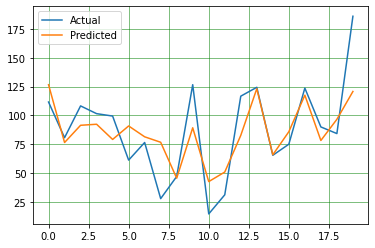

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,76.349300,76.469564,-0.120264,0.157518
1,74.583000,76.208365,-1.625365,2.179270
2,48.072000,60.776031,-12.704031,26.427091
3,77.380700,74.585105,2.795595,3.612781
4,139.201000,124.371823,14.829177,10.653068
5,107.767000,115.679034,-7.912034,7.341796
6,92.675000,120.230306,-27.555306,29.733267
7,56.388000,87.699442,-31.311442,55.528556
8,135.229000,103.019274,32.209726,23.818653
9,85.402000,87.869105,-2.467105,2.888814


###SVR using hyperparameter tunning

In [ ]:
##applying Gridsearchcv on SVR
svr=SVR(kernel='rbf')
grid_sv = GridSearchCV(svr, param_grid={"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}, scoring='r2', verbose=3)
grid_sv.fit(x_train, y_train)
print(grid_sv.best_score_)
print(grid_sv.best_estimator_)
print(grid_sv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.443 total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.454 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.453 total time=   0.3s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.481 total time=   0.2s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.449 total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.446 total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.438 total time=   0.2s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.425 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.523 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.487 total time=   0.3s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.401 total time=   0.1s
[CV 2/5] END .................C=0.1, gamma=0.01

###KNN

In [ ]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
hp_candidates = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsRegressor()
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn, param_grid=hp_candidates, cv=5, scoring='r2')
grid.fit(x_train, y_train)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.5019910434206775
KNeighborsRegressor(n_neighbors=12, weights='distance')
{'n_neighbors': 12, 'weights': 'distance'}


In [ ]:
regressor=KNeighborsRegressor(n_neighbors=12, weights='distance')
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=12, weights='distance')

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([[-0.57772768],
       [-0.07821385],
       [-0.9766119 ],
       [-0.46977444],
       [ 1.05099638],
       [ 1.11000616],
       [ 0.83081532],
       [ 0.0418    ],
       [ 0.74764621],
       [-0.02935409],
       [-0.72356229],
       [ 0.94147489],
       [ 0.04651379],
       [-0.19484583],
       [ 0.38624593],
       [-1.03302964],
       [ 0.73755765],
       [ 0.77431016],
       [ 1.37559853],
       [-0.17365028],
       [ 0.3840595 ],
       [ 0.35323545],
       [ 0.78394296],
       [-0.23729723],
       [-1.62380859],
       [ 0.07157319],
       [ 1.24487833],
       [ 0.45086138],
       [ 0.46755361],
       [-0.50701662],
       [-1.14555021],
       [-0.14839819],
       [ 0.55492574],
       [-0.52457338],
       [ 0.48881564],
       [-0.02211496],
       [ 0.94320008],
       [ 0.6400828 ],
       [-0.49747668],
       [ 0.93285486],
       [-0.27712725],
       [ 0.74802149],
       [ 1.30845786],
       [-0.91416475],
       [ 0.54697423],
       [-1

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.5429894917647756
mean_sqrd_error is  0.42541444800352923
Root mean squared error of is 0.6522380301726735
Mean Absolute error is 0.5070207115753346


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 76.34929998],
       [ 74.583     ],
       [ 48.072     ],
       [ 77.38070001],
       [139.201     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 68.98702034],
       [ 85.61596437],
       [ 55.9967423 ],
       [ 72.54884697],
       [124.40483969]])

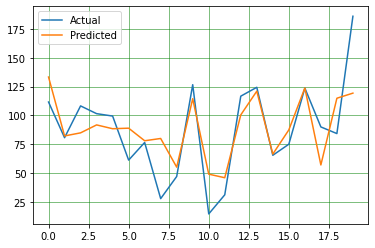

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,76.349300,68.987020,7.362280,9.642891
1,74.583000,85.615964,-11.032964,14.792868
2,48.072000,55.996742,-7.924742,16.485152
3,77.380700,72.548847,4.831853,6.244261
4,139.201000,124.404840,14.796160,10.629349
5,107.767000,126.471021,-18.704021,17.355982
6,92.675000,116.727226,-24.052226,25.953305
7,56.388000,89.664423,-33.276423,59.013306
8,135.229000,113.840593,21.388407,15.816435
9,85.402000,87.261820,-1.859820,2.177724


###Random forest

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:


from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)



In [ ]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  



In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True) 
regressor.fit( x_train, y_train) 

RandomForestRegressor(max_depth=120, max_features='sqrt', min_samples_split=6)

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([-0.47297366,  0.62504986, -1.05990384, -0.29497858,  0.93674444,
        0.76246271,  0.65882545,  0.0582302 ,  0.77414289, -0.17570619,
       -0.58695971,  0.59914735, -0.13755525, -0.50959789,  0.5912079 ,
       -1.00365167,  0.75342161,  0.79148541,  1.55644122, -0.66547725,
        0.23182746,  0.23148356,  0.87741678, -0.43862158, -1.33958334,
        0.0664541 ,  0.6132857 ,  0.25145273,  0.19749707, -0.56148005,
       -1.08899899, -0.0558414 ,  0.51497957, -0.52140308,  0.73676068,
        0.12179882,  1.12950379,  0.55787881, -0.72652609,  0.98980076,
       -0.4742605 ,  0.76837625,  1.17928435, -0.9234299 ,  0.48597745,
       -1.24870044,  1.20126978,  1.02171299, -1.48717838,  0.8233752 ,
        0.44258884,  0.49783012, -0.04823095,  1.00403262, -0.44139427,
       -0.50781485, -0.16322825, -0.703837  , -0.62613979, -0.17619513,
        0.84612476,  0.02226903,  0.17687926, -1.29796365,  0.20407975,
        0.87653634,  0.29058944,  0.13497992, -0.53470816,  0.42

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.5920873801002835
mean_sqrd_error is  0.3797110108002025
Root mean squared error of is 0.6162069545211272
Mean Absolute error is 0.48233431992291664


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 76.34929998],
       [ 74.583     ],
       [ 48.072     ],
       [ 77.38070001],
       [139.201     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 72.44302623],
       [109.59941075],
       [ 53.32091233],
       [ 78.35437609],
       [120.41457336]])

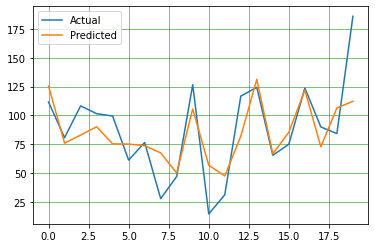

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,76.349300,72.443026,3.906274,5.116319
1,74.583000,109.599411,-35.016411,46.949587
2,48.072000,53.320912,-5.248912,10.918856
3,77.380700,78.354376,-0.973676,1.258293
4,139.201000,120.414573,18.786427,13.495899
5,107.767000,114.354293,-6.587293,6.112532
6,92.675000,110.766192,-18.091192,19.521114
7,56.388000,90.220166,-33.832166,59.998875
8,135.229000,114.759423,20.469577,15.136973
9,85.402000,82.341742,3.060258,3.583356


###Without tunning

In [ ]:


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_fs,y_train)

NameError: ignored

In [ ]:


y_prediction =  regressor.predict(x_test_fs)
y_prediction 



array([-0.65478759,  0.89491296, -1.15576105, -0.2170543 ,  0.96437848,
        0.7392572 ,  0.50551729, -0.17525839,  0.66294991,  0.11241596,
       -0.49488644,  0.69049662,  0.01161018, -0.54534853,  0.47380834,
       -0.84691329,  0.77923023,  0.8665236 ,  1.49413255, -0.54409065,
        0.1940626 ,  0.30796624,  0.82879322, -0.60839431, -1.49899848,
       -0.0850184 ,  0.44024266,  0.15922241,  0.15525558, -0.51292134,
       -1.26514271,  0.0156341 ,  0.72313755, -0.72612157,  0.74874821,
       -0.01293279,  1.05589446,  0.80490697, -0.52241416,  0.91381652,
       -0.68478667,  0.80241785,  1.24336341, -0.91052476,  0.34169891,
       -1.20569213,  1.45705412,  1.00096611, -1.72854226,  0.89427934,
        0.40040688,  0.45773872,  0.12906795,  0.85828066, -0.54406152,
       -0.6018715 , -0.16470364, -0.62495167, -0.61632202, -0.12174229,
        0.79264552,  0.04941073, -0.04428849, -1.26938126,  0.17587331,
        0.972116  ,  0.22013557,  0.0201539 , -0.66574945,  0.35

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.5811807089481009
mean_sqrd_error is  0.38986363399847174
Root mean squared error of is 0.6243906101139508
Mean Absolute error is 0.4857993144882354


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 76.34929998],
       [ 74.583     ],
       [ 48.072     ],
       [ 77.38070001],
       [139.201     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 66.45602324],
       [118.95701302],
       [ 50.25847869],
       [ 80.95712598],
       [121.37845252]])

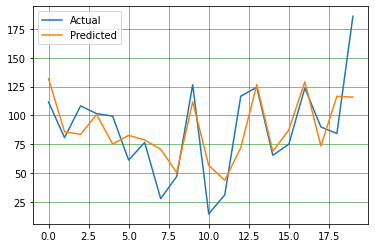

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,76.349300,66.456023,9.893277,12.957914
1,74.583000,118.957013,-44.374013,59.496149
2,48.072000,50.258479,-2.186479,4.548341
3,77.380700,80.957126,-3.576426,4.621858
4,139.201000,121.378453,17.822547,12.803462
5,107.767000,113.549847,-5.782847,5.366065
6,92.675000,105.480580,-12.805580,13.817729
7,56.388000,82.356751,-25.968751,46.053684
8,135.229000,110.908760,24.320240,17.984486
9,85.402000,92.055480,-6.653480,7.790777


###Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([-0.2942044 ,  0.16425698, -0.52887325, -0.37583708,  1.03445497,
        0.78969088,  0.71621671,  0.12589298,  0.90190914, -0.12898259,
       -0.73800892,  0.61540792,  0.04636213, -0.61018047,  0.72345932,
       -0.93121928,  0.5551665 ,  0.86483709,  1.24686784, -0.64994175,
        0.30964501,  0.28101707,  0.9167451 , -0.46526022, -1.29878557,
       -0.11468539,  0.50763032,  0.36046042,  0.27992061, -0.50740952,
       -1.42467562, -0.0951044 ,  0.3281376 , -0.4598332 ,  0.60116188,
       -0.20712648,  0.92973063,  0.65914543, -0.67274444,  0.84355297,
       -0.80336369,  0.47285835,  1.06453849, -0.80456495,  0.77624855,
       -1.37072521,  1.02251513,  1.14195383, -1.64735767,  0.90826097,
        0.54137846,  0.5302297 ,  0.05185546,  0.99225896, -1.00514062,
       -0.29010833, -0.24285174, -0.69429923, -0.59791275, -0.02996421,
        0.6384786 , -0.04329071,  0.18969545, -1.3370795 ,  0.30604325,
        0.89369539,  0.26334514,  0.26190787, -0.54125295,  0.60

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.5382459478638999
mean_sqrd_error is  0.4298300403669611
Root mean squared error of is 0.6556142466168358
Mean Absolute error is 0.5258678676846569


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 76.34929998],
       [ 74.583     ],
       [ 48.072     ],
       [ 77.38070001],
       [139.201     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 78.38019089],
       [ 93.81493843],
       [ 70.5966323 ],
       [ 75.66306078],
       [123.82629308]])

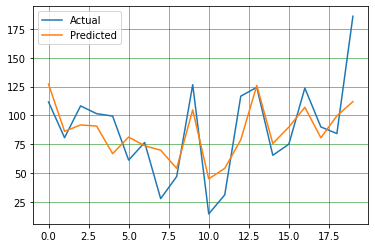

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:


result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERNCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)



,ACTUAL AQI,PREDICTED AQI,DIFFERNCE,PERCENTAGE ERROR
0,76.349300,78.380191,-2.030891,2.659999
1,74.583000,93.814938,-19.231938,25.785954
2,48.072000,70.596632,-22.524632,46.856033
3,77.380700,75.663061,1.717639,2.219726
4,139.201000,123.826293,15.374707,11.044969
5,107.767000,115.298940,-7.531940,6.989096
6,92.675000,112.751708,-20.076708,21.663564
7,56.388000,92.512550,-36.124550,64.064252
8,135.229000,119.200657,16.028343,11.852741
9,85.402000,83.909274,1.492726,1.747881


###Ensembling approach

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:

rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
svr = SVR()

In [ ]:
estimators = [('rf',rf),('dt',dt),('svr',svr)]

In [ ]:


for estimator in estimators:
  scores = cross_val_score(estimator[1],x_train,y_train,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))



rf 0.51
dt 0.07
svr 0.49


In [ ]:

from sklearn.ensemble import VotingRegressor


In [ ]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,x_train,y_train,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.47
